In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

/home/zafar/.pyenv/versions/2.7.13/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from keras.datasets import imdb
from keras import preprocessing

Using TensorFlow backend.


In [3]:
max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)
X_train = preprocessing.sequence.pad_sequences(x_train, maxlen = maxlen)
X_test = preprocessing.sequence.pad_sequences(x_test, maxlen = maxlen)

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 77us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 1s 56us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 1s 56us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 1s 66us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/10
20000/20000 [==============================] - 1s 66us/step - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/10
20000/20000 [==============================] - 1s 57us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
20000/20000 [==============================] - 1s 57us/step - loss: 0.3435 - acc: 0.8533 - val_loss: 0.5052 - val_acc:

In [9]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = np.arange(1, len(acc)+1)

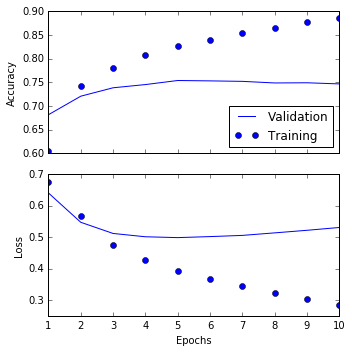

In [20]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(5,5))

ax[0].plot(epochs, val_acc, '-b', label='Validation')
ax[0].plot(epochs, acc, 'ob', label='Training')
ax[0].set_ylabel("Accuracy")
ax[0].legend(loc='best')

ax[1].plot(epochs, val_loss, '-b', label='Validation')
ax[1].plot(epochs, loss, 'ob', label='Training')
ax[1].set_ylabel("Loss")
ax[1].set_xlabel("Epochs")

plt.tight_layout()